In [19]:
import pandas as pd
import ta

In [6]:
data=pd.read_csv('../data/processed/crypto_data.csv')
data.head() 

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume
0,2023-02-25,23184.04,23219.13,22722.00,23157.07,191311.81010,2023-02-25 23:59:59.999,4.406286e+09,9124568,94440.13964,2.175284e+09
1,2023-02-26,23157.07,23689.99,23059.18,23554.85,202323.73623,2023-02-26 23:59:59.999,4.716158e+09,9506015,101003.39278,2.354572e+09
2,2023-02-27,23554.85,23897.99,23106.77,23492.09,283706.08590,2023-02-27 23:59:59.999,6.659786e+09,11754195,141360.04845,3.318354e+09
3,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.99894,2023-02-28 23:59:59.999,6.172931e+09,9568743,131200.82704,3.066250e+09
4,2023-03-01,23141.57,24000.00,23020.03,23628.97,315287.41737,2023-03-01 23:59:59.999,7.441571e+09,9390487,157961.92667,3.728257e+09


In [10]:
#check 1 day returns
data['1_day_return'] = data['close'].pct_change(periods=1)
data[['close','1_day_return']].head(10)

,close,1_day_return
0,23157.07,NaN
1,23554.85,0.017177
2,23492.09,-0.002664
3,23141.57,-0.014921
4,23628.97,0.021062
5,23465.32,-0.006926
6,22354.34,-0.047346
7,22346.57,-0.000348
8,22430.24,0.003744
9,22410.00,-0.000902


In [12]:
#7day returns
data['7_day_return'] = data['close'].pct_change(periods=7)
data[['close','7_day_return']].head(20)

,close,7_day_return
0,23157.07,NaN
1,23554.85,NaN
2,23492.09,NaN
3,23141.57,NaN
4,23628.97,NaN
5,23465.32,NaN
6,22354.34,NaN
7,22346.57,-0.035000
8,22430.24,-0.047744
9,22410.00,-0.046062


In [15]:
# checking the rolling volatility
data['7_day_volatility'] = data['1_day_return'].rolling(window=7).std()
data['30_day_volatility'] = data['1_day_return'].rolling(window=30).std()
data[['1_day_return', '7_day_volatility','30_day_volatility']].tail(30)

,1_day_return,7_day_volatility,30_day_volatility
970,-0.006743,0.016733,0.023229
971,0.023341,0.017101,0.023639
972,0.008419,0.014971,0.023589
973,0.005778,0.014965,0.022510
974,0.026092,0.016678,0.022957
975,-0.003943,0.016566,0.022978
976,-0.010597,0.014417,0.022714
977,-0.025484,0.018383,0.022909
978,-0.015437,0.017165,0.023060
979,0.011864,0.017564,0.021865


In [21]:
data['1_day_volatility'] = data['1_day_return'].rolling(window=24).std()
data[['1_day_return', '1_day_volatility']].tail()


,1_day_return,1_day_volatility
995,-0.013963,0.022077
996,-0.021709,0.022066
997,0.008086,0.022131
998,-0.015123,0.020992
999,0.003371,0.021123


In [ ]:
#adding technical indicators
data["rsi"] = ta.momentum.RSIIndicator(data["close"]).rsi()
data["sma_20"] = data["close"].rolling(20).mean()

In [22]:
### **2. Technical Indicators**

#Using `ta` or `ta-lib`:

# RSI\
 #MACD\
 #Moving averages (SMA20, SMA50, SMA200)\
 #Bollinger Bands\
 #Stochastic Oscillator
data['rsi'] = ta.momentum.RSIIndicator(data['close']).rsi()
data['macd'] = ta.trend.MACD(data['close']).macd()
data['sma20'] = ta.trend.SMAIndicator(data['close'], window=20).sma_indicator()
data['sma50'] = ta.trend.SMAIndicator(data['close'], window=50).sma_indicator()
data['sma200'] = ta.trend.SMAIndicator(data['close'], window=200).sma_indicator()
bb_indicator = ta.volatility.BollingerBands(data['close'])
data['bb_high'] = bb_indicator.bollinger_hband()
data['bb_low'] = bb_indicator.bollinger_lband()
data['stochastic_oscillator'] = ta.momentum.StochasticOscillator(data['high'], data['low'], data['close']).stoch()
data.tail()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,rsi,sma_20,1_day_volatility,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator
995,2025-11-16,95596.23,96635.11,93005.55,94261.44,23889.40510,2025-11-16 23:59:59.999,2.261296e+09,5141394,10828.62752,...,31.029154,104002.2020,0.022077,-3896.543200,104002.2020,110286.8176,110444.91680,114511.886795,93492.517205,7.077650
996,2025-11-17,94261.45,96043.00,91220.00,92215.14,39218.59806,2025-11-17 23:59:59.999,3.674562e+09,8134322,18690.19245,...,28.830303,102968.0365,0.022066,-4256.195101,102968.0365,109887.8414,110423.54295,113836.973973,92099.099027,6.112654
997,2025-11-18,92215.14,93836.01,89253.78,92960.83,39835.14769,2025-11-18 23:59:59.999,3.641033e+09,8786593,20130.95957,...,30.755973,102115.0135,0.022131,-4429.984767,102115.0135,109460.8188,110403.91140,113308.867538,90921.159462,20.316811
998,2025-11-19,92960.83,92980.22,88608.00,91554.96,32286.63760,2025-11-19 23:59:59.999,2.925774e+09,6822174,15060.08451,...,29.154345,101276.6175,0.020992,-4627.809778,101276.6175,109010.9394,110382.40410,112984.997469,89568.237531,15.598984
999,2025-11-20,91554.96,93160.00,91185.26,91863.55,11227.11465,2025-11-20 23:59:59.999,1.035375e+09,2246475,5472.35717,...,30.015841,100389.3945,0.021123,-4705.445444,100389.3945,108476.3106,110370.33375,112127.207356,88651.581644,17.232426


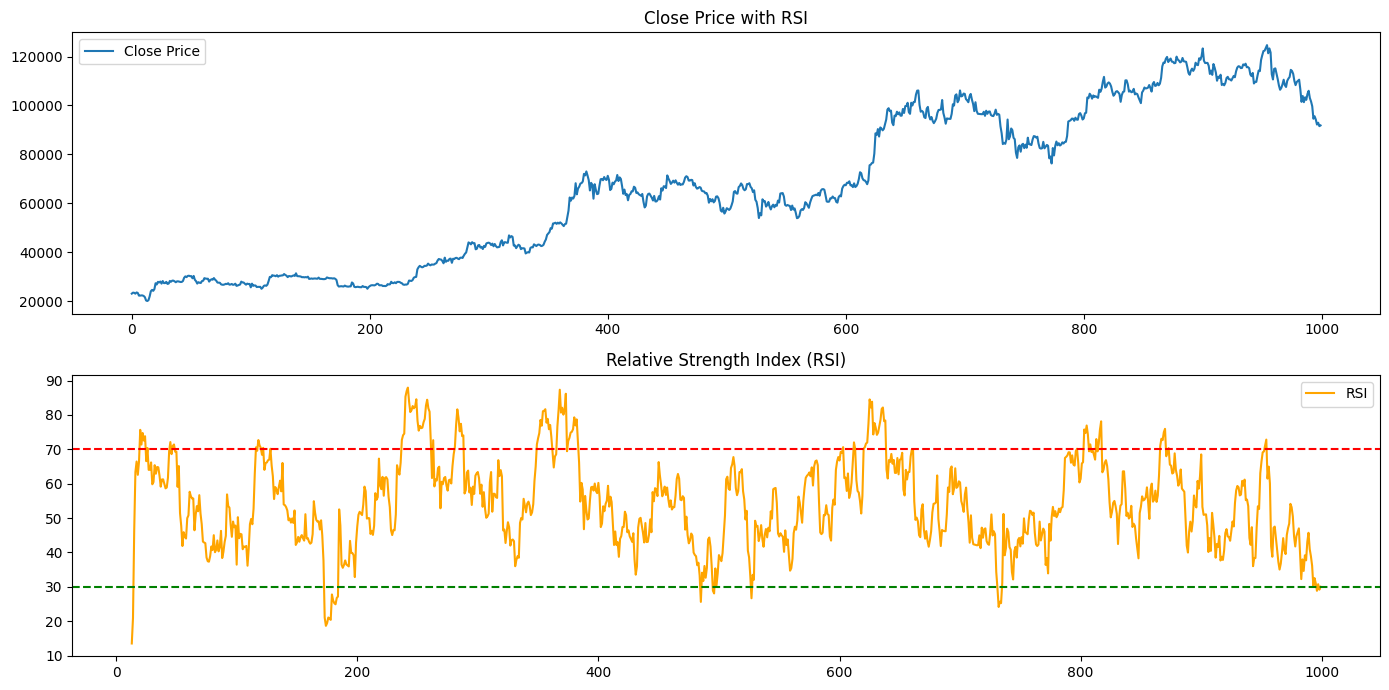

In [23]:
#visualize the features of rsi
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(data['close'], label='Close Price')
plt.title('Close Price with RSI')
plt.legend()
plt.subplot(2,1,2)
plt.plot(data['rsi'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.tight_layout()
plt.show()


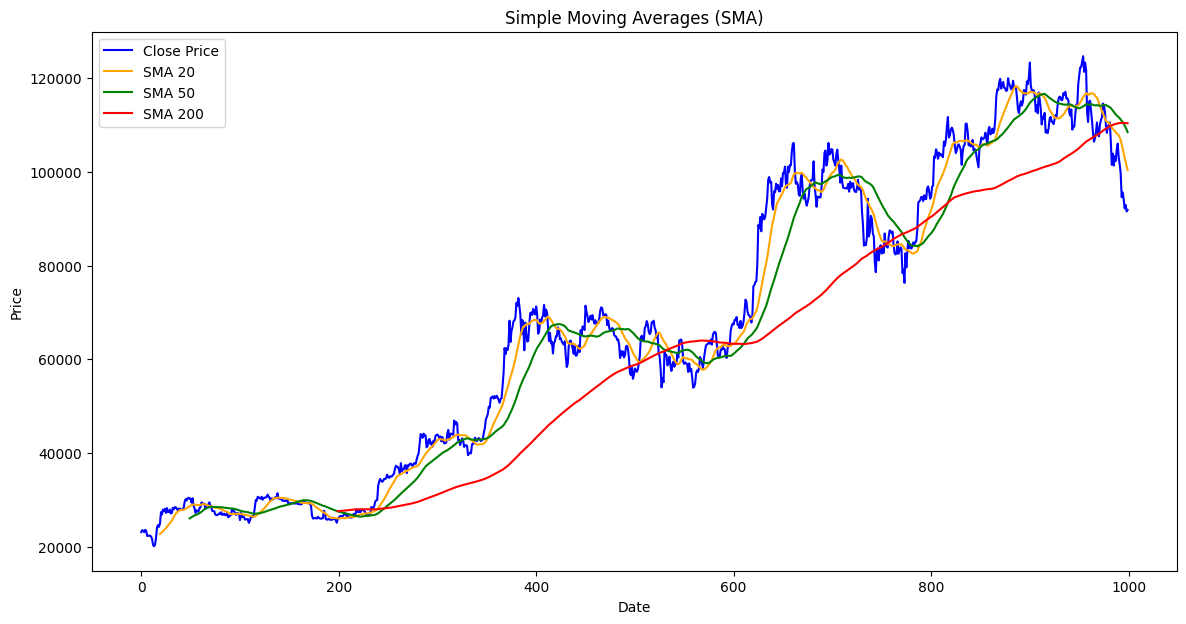

In [25]:
# Visualize the sma20, sma50, sma200 features
plt.figure(figsize=(14,7))
plt.plot(data['close'], label='Close Price', color='blue')  
plt.plot(data['sma20'], label='SMA 20', color='orange')
plt.plot(data['sma50'], label='SMA 50', color='green')
plt.plot(data['sma200'], label='SMA 200', color='red')
plt.title('Simple Moving Averages (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

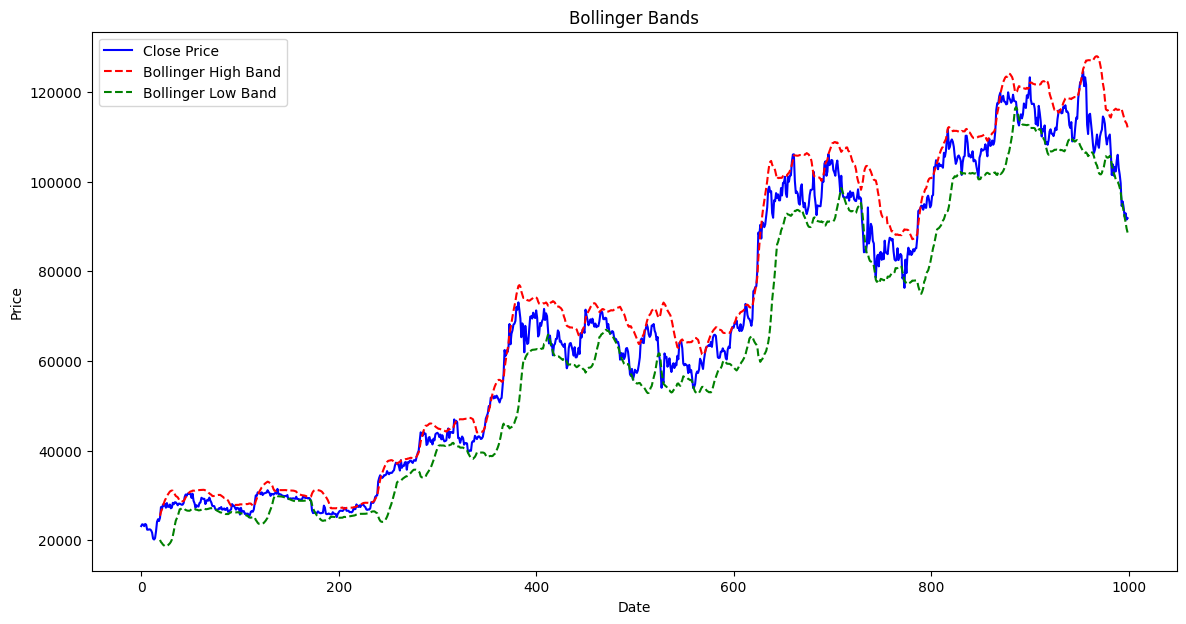

In [26]:
# visualize the bollinger bands
plt.figure(figsize=(14,7))
plt.plot(data['close'], label='Close Price', color='blue')
plt.plot(data['bb_high'], label='Bollinger High Band', color='red', linestyle='--')
plt.plot(data['bb_low'], label='Bollinger Low Band', color='green', linestyle='--')
plt.title('Bollinger Bands')   
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()